#Task Objectives:
#1. Clean and prepare the data
#2. Explore and visualise general placement numbers according to given characteristics
#3. Determine what factors most affect placement
#4. Predict probability of placement with 2 features

NB: I'm just a beginner so please grant me the benefit of a doubt :)



In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
students = pd.read_csv(r"E:\My Python codes\Placement_Data_Full_Class.csv", index_col = ["sl_no"], squeeze = True)
students.sort_index(inplace = True)

students

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [3]:
students['ssc_b'].value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

In [4]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


In [5]:
#Now we're just filling in salary Null values with 0
students['salary']=students['salary'].fillna(0)
students

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [6]:
#Looking at a summary of the statistics in the data
students.describe().round(2)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.00,215.00,215.00,215.00,215.00,215.00
mean,67.30,66.33,66.37,72.10,62.28,198702.33
std,10.83,10.90,7.36,13.28,5.83,154780.93
min,40.89,37.00,50.00,50.00,51.21,0.00
25%,60.60,60.90,61.00,60.00,57.94,0.00
50%,67.00,65.00,66.00,71.00,62.00,240000.00
75%,75.70,73.00,72.00,83.50,66.26,282500.00
max,89.40,97.70,91.00,98.00,77.89,940000.00


In [7]:
#summary of status placement
students['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

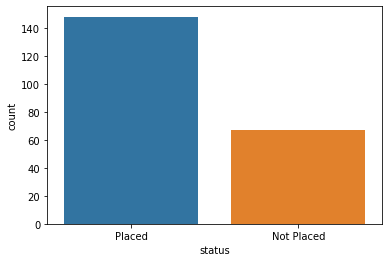

In [8]:
#let's have a countplot to see what how many students were placed and not placed overall
sns.countplot(x='status', data=students)

In [9]:
#Number of students with and without experience
students['workex'].value_counts()

No     141
Yes     74
Name: workex, dtype: int64

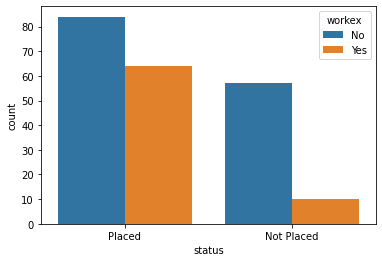

In [10]:
#Overall, I want to find out whether experience had a role to play in placement
sns.countplot('status',data=students, hue='workex')
#Looks like majority of the students didn't have experience. Only a small number of those not placed had experience. Most didn't

In [11]:
status_placed = students[students["status"]=="Placed"]
status_placed['salary'].min()

200000.0

In [12]:
#a summary number of students placed and their degree course
placed_counts = status_placed['degree_t'].value_counts()
placed_counts.max

<bound method Series.max of Comm&Mgmt    102
Sci&Tech      41
Others         5
Name: degree_t, dtype: int64>

In [13]:
#a summary of number of students from each degree type
degree_count = students['degree_t'].value_counts()
degree_count

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

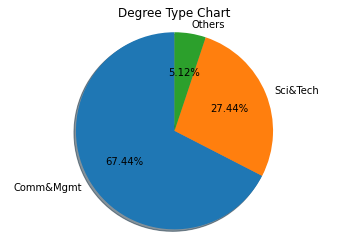

In [14]:
#A visualisation of the distribution of students with the 3 degree types. Comm&mgmt was most popular
labels1 = ('Comm&Mgmt', 'Sci&Tech', 'Others')
Number1 = [145, 59, 11]

fig2, ax2 = plt.subplots()
ax2.pie(Number1, labels=labels1, autopct='%1.2f%%', shadow=True, startangle=90)
ax2.axis('equal') 
plt.title('Degree Type Chart')
plt.show()

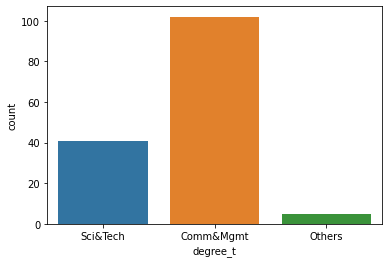

In [15]:

sns.countplot(x='degree_t',data=status_placed)

Among those who found placement,comm&mgmt scored highest(Probably because they were the most). Or it could be more favoured by employers

In [16]:

students['status'] = students['status'].replace(['1','0'],['Placed','Not Placed'])
students['workex'] = students['workex'].replace(['1','0'],['Yes','No'])
students.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


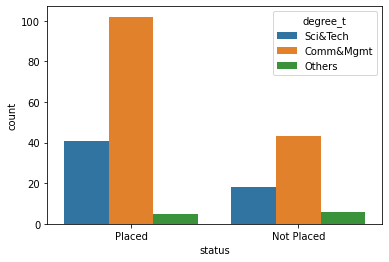

In [17]:
#Comparison of placement status among different degree types
sns.countplot(x='status', data=students, hue='degree_t')


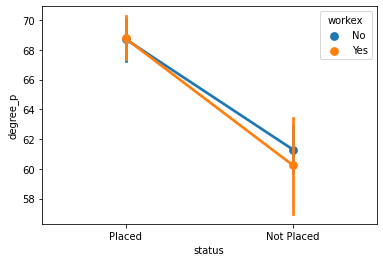

In [18]:
#Curious to see if grades also affected placement
ax = sns.pointplot(x='status', y='degree_p', data=students, hue='workex')

Evidently, the higher your grades, the more likely you were to be placed. What about grades on other levels?

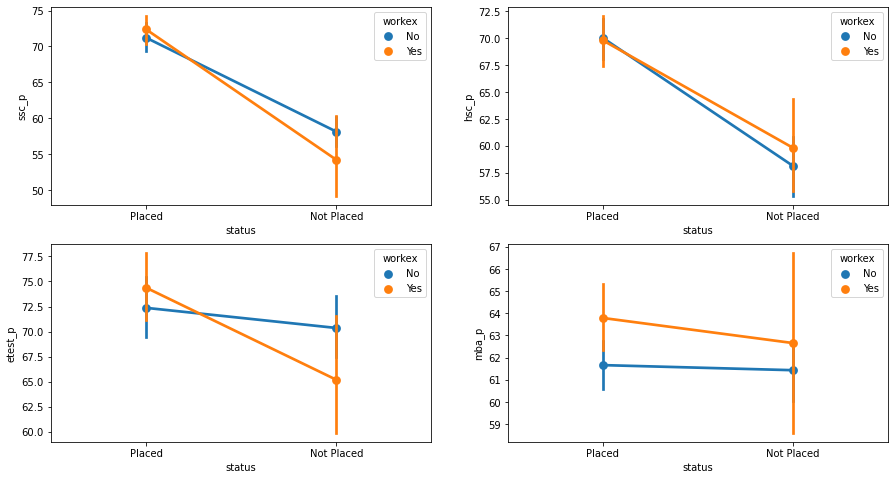

In [19]:

fig,axes = plt.subplots(2,2, figsize=(15,8))
sns.pointplot(x='status', y='ssc_p', data=students, hue='workex', ax=axes[0][0])
sns.pointplot(x='status', y='hsc_p', data=students, hue='workex', ax=axes[0][1])
sns.pointplot(x='status', y='etest_p', data=students, hue='workex', ax=axes[1][0])
sns.pointplot(x='status', y='mba_p', data=students, hue='workex', ax=axes[1][1])


#Overall, the higher your grades across, the more likely you were placed
#Interestingly, mba scores had the least effect on placement. 
#Alot more of those who had mba also had work experience which explains the almost equal placement

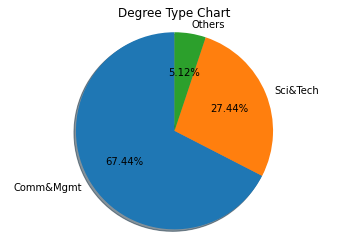

In [20]:

labels1 = ('Comm&Mgmt', 'Sci&Tech', 'Others')
Number1 = [145, 59, 11]

fig2, ax2 = plt.subplots()
ax2.pie(Number1, labels=labels1, autopct='%1.2f%%', shadow=True, startangle=90)
ax2.axis('equal') 
plt.title('Degree Type Chart')
plt.show()

In [21]:
#Lets look at the gender  distribution. More males than females
gender_count = students['gender'].value_counts()
gender_count

M    139
F     76
Name: gender, dtype: int64

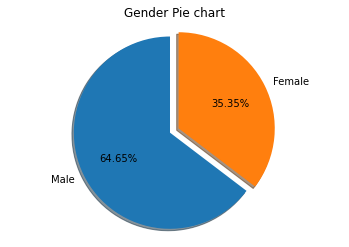

In [22]:
labels = 'Male', 'Female'
Number = [139, 76]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(Number, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender Pie chart')
plt.show()

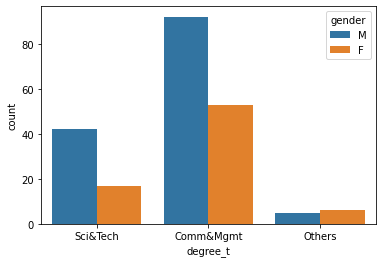

In [23]:
#Overall distribution by gender by degree course
g = sns.countplot(x="degree_t", hue="gender", data=students)


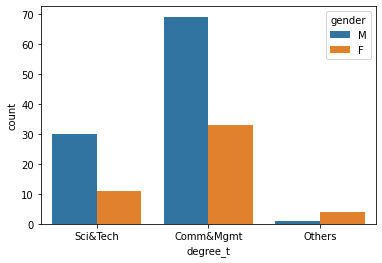

In [24]:
#Distribution by gender by degree course among those placed
g1 = sns.countplot(x="degree_t", hue="gender", data=status_placed)

Now lets build a model using 2 features (degree_p and mba_p) to predict placement probability!

In [25]:
students['status'] = students['status'].replace(['1','0'],['Placed','Not Placed'])
students.head()
                                                

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [26]:
#probility of placement using etest and degree scores
X = students[['etest_p','degree_p']]
y = students['status']

In [27]:
# 1. Import the estimator object (model)
from sklearn.linear_model import LogisticRegression

# 2. Create an instance of the estimator
logreg = LogisticRegression()

# 3. Use the trainning data to train the estimator
logreg.fit(X, y)

LogisticRegression()

In [28]:
print(logreg.intercept_)
print(logreg.coef_)

[-12.3233507]
[[0.00751877 0.19429071]]


In [29]:
def Z(etest_p, degree_p):
    return logreg.intercept_[0] + logreg.coef_[0][0]*etest_p + logreg.coef_[0][1]*degree_p

def prob_plcmt(etest, degree_p):
    z = Z(etest, degree_p) 
    return 1/(1 + np.exp(-z))

In [49]:
prob_plcmt(etest=50.00, degree_p=65.00)

0.6640698946327244

In [47]:
status_placed['degree_p'].mean()

68.74054054054054

Evidently, high degree scores were more favoured for placement than e test scores. We can see the same in the box plots below

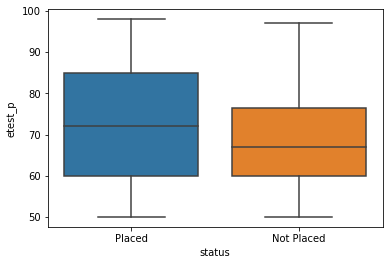

In [31]:
sns.boxplot(x='status', y='etest_p', data=students)

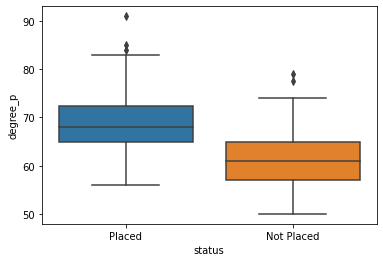

In [32]:
sns.boxplot(x='status', y='degree_p', data=students)

Next: general salary distribution and salary dist among specialisations, gender, etc

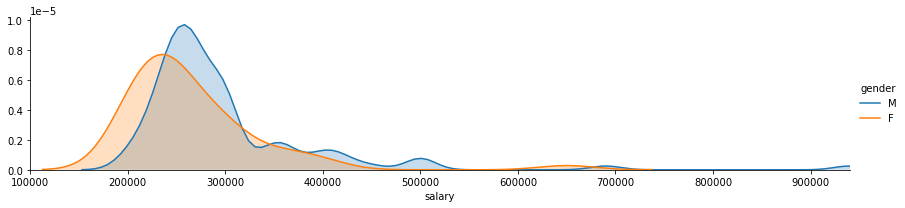

In [33]:
#salary distribution by gender

s = sns.FacetGrid(status_placed, hue="gender",aspect=4)

# Next use map to plot all the possible kdeplots for the 'salary' column by gender choice
s.map(sns.kdeplot,'salary',shade= True)

# Set the x max limit by the highest paid student
highest = status_placed['salary'].max()

# set the x lower limit at 10000
s.set(xlim=(100000,highest))

#Finally add a legend
s.add_legend()


Men have a higher starting salary than women (no surprise there!)

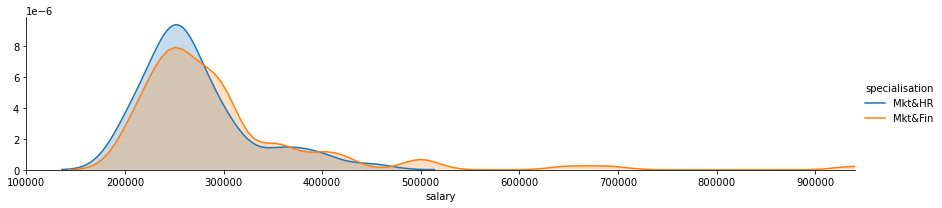

In [34]:
#salary distribution by specialisation
sp = sns.FacetGrid(status_placed, hue="specialisation",aspect=4)

sp.map(sns.kdeplot,'salary',shade= True)

highest = status_placed['salary'].max()

sp.set(xlim=(100000,highest))
sp.add_legend()



Mkt&Fin generally pays better

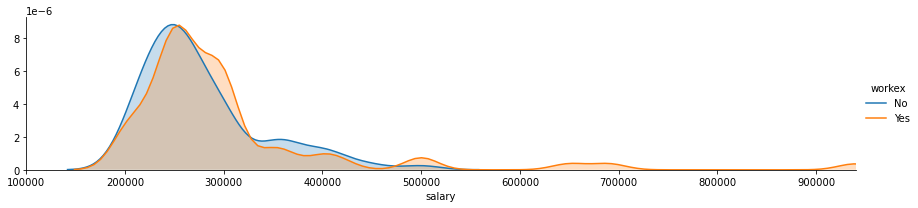

In [35]:
#what about work experience? does having work experience affect salary? Lets fiind out!
sx = sns.FacetGrid(status_placed, hue="workex",aspect=4)

sx.map(sns.kdeplot,'salary',shade= True)

highest = status_placed['salary'].max()

sx.set(xlim=(100000,highest))

sx.add_legend()

Both have relatively similar salaries but people with some experience show higher pay rates. Could be because of more years of experience